# Lekcja 4: Statystyki opisowe i parametry

**Cele nauki Pythona**

1. Dowiesz się, jak połączyć dwie instrukcje logiczne w funkcji `.loc[]` w celu manipulacji danymi;
2. Przećwiczysz funkcje matematyczne na kolumnach *DataFrame*.

**Co będziesz w stanie zrobić z tymi umiejętnościami**

1. Obliczyć zmianę procentową, wariancję i odchylenie standardowe od podstaw.
2. Dowiesz się, jak opisać zbiór danych za pomocą opisowych statystyk i parametrów.
3. Dowiesz się, jak obliczyć rozstęp międzykwartylowy i użyć go do znalezienia wartości odstających w zbiorze danych


W tej lekcji dowiesz się, jak obliczać różne deskryptory danych *(data descriptors)*, a co ważniejsze, nauczysz się interpretować te pomiary.

Po raz kolejny w tej lekcji musimy zaimportować bibliotekę `pandas`.

In [1]:
import pandas as pd

**Średnie**

Zestaw danych wykorzystany w tej sekcji, to liczba dni między wypadkami w brytyjskich kopalniach, z co najmniej 10 ofiarami śmiertelnymi w okresie od 06.12.1875 do 29.05.1951. [1]

Poniżej znajduje się wykres histogramu tego zbioru danych, który pokazuje jego rozkład.

<AxesSubplot:ylabel='Frequency'>

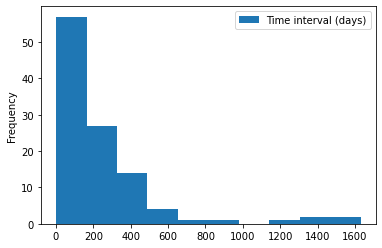

In [2]:
MineAccidentDF = pd.read_csv("https://raw.githubusercontent.com/ThomasJewson/datasets/master/TimeBetweenBritishMineAccident.csv")
MineAccidentDF.plot.hist(bins=10)

*1. Średnia*

Średnia zbioru liczb to suma wszystkich elementów zbioru podzielona przez liczbę elementów tego zbioru.

Średnią można obliczyć za pomocą [funkcji](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) `.mean()`, której używamy na wybranej kolumnie w naszym *DataFrame*. W tym przypadku chcemy znaleźć średnią z kolumny `Time interval (days)` w `MineAccidentDF` *DataFrame*.

Dlatego używamy następującego kodu:

In [3]:
MineAccidentDF["Time interval (days)"].mean()

240.94495412844037

Właściwości średniej:

- Nie musi być elementem zbioru danych;
- Nie musi być liczbą całkowitą, nawet jeśli wszystkie elementy zbioru są liczbami całkowitymi;
- Znajduje się pomiędzy największymi i najmniejszymi elementami w zbiorze danych;
- Niekoniecznie znajduje się w połowie zbioru między dwiema skrajnymi wartościami(minimalną i maksymalną).

Zauważ, że średnia nie jest „środkowym punktem” danych. Jeśli spojrzysz na wyświetlony wcześniej histogram, możesz to sobie udowodnić.

*2. Mediana*

Mediana, to liczba znajdująca się w środku posortowanej listy liczb.

Można ją obliczyć za pomocą [funkcji](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html) `.median()` używanej na *DataFrame*.

In [4]:
MineAccidentDF["Time interval (days)"].median()

145.0

Jeśli średnia jest równa medianie, to rozkład jest symetryczny. Jeśli średnia nie jest równa medianie, mamy rozkład skośny.

Dla przykładu poniżej utworzymy i wykreślimy rozkład symetryczny.

In [1]:
Symmetrical = pd.DataFrame(
[1,2,2,3,3,3,4,4,4,4,5,5,5,5,5,6,6,6,6,7,7,7,8,8,9]
)
Symmetrical.plot.hist(bins=9)

NameError: name 'pd' is not defined

In [6]:
MyDataFrame.describe()

NameError: name 'MyDataFrame' is not defined

In [7]:
Symmetrical[0].mean()

5.0

In [8]:
Symmetrical[0].median()

5.0

In [9]:
Symmetrical[0].median() == Symmetrical[0].mean()

True

Ponieważ mediana i średnia są równe, rozkład ten jest symetryczny.

**Zadanie 1:** * Utwórz wyrażenie logiczne i uzyskaj wynik `True` lub `False`, utożsamiając – z operatorem porównania `==` – średnią i medianę `MineAccidentDF["Time interval (days)"]`, tak jak w powyższej komórce. Co wynik tego wyrażenia mówi o symetrii rozkładu?*

In [1]:
#Odpowiedź
MineAccidentDF["Time interval (days)"].median() == MineAccidentDF["Time interval (days)"].mean()

#False - rozkład niesymetryczny

NameError: name 'MineAccidentDF' is not defined

*3. Wartość modalna*

"Mode" lub wartość modalna jest najczęstszym punktem odniesienia w zestawie. To znaczt, jest to wartość o największym prawdopodobieństwie wystąpienia w tym zbiorze.

Można ją obliczyć za pomocą [funkcji](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html) `.mode()`.

In [11]:
Symmetrical[0].mode()

0    5
dtype: int64

**Miary rozpiętości**

*1. Zmienność i wariancja*

Prostą metodą pomiaru zmienności jest pomiar odchylenia od średniej. Można to osiągnąć odejmując średnią od danych.

$ Średnie \space Odchylenie = Dane - Średnia $

Poniższy kod wykonuje następujące czynności:

1. Oblicza średnią ramki *DataFrame* `Symmetrical` za pomocą funkcji `.mean()` i zapisuje wynik w zmiennej o nazwie `SymmetircalMean`.
```Python
SymmetricalMean = Symmetircal.mean()
```
2. Oblicza odchylenie średniej, odejmując średnią od danych i zapisując ją jako nową kolumnę w kolumnie `Symmetrical` o nazwie `Deviation from Mean`.
```Python
Symmetrical["Deviation from Mean"] = Symmetrical - SymmetricalMean
```
3. Następnie `Symmetrical` *DataFrame* jest wyprowadzana przez wywołanie jej nazwy.
```Python
Symmetrical
```

In [3]:
SymmetricalMean = Symmetrical.mean() # Znajduje średnią zbioru danych
Symmetrical["Deviation from Mean"] = Symmetrical - SymmetricalMean # Znajduje odchylenie każdej danej od średniej
Symmetrical # Wypisuje uzyskane wyniki

NameError: name 'Symmetrical' is not defined

Odchylenia są ujemne, gdy dane są mniejsze od średniej i dodatnie, gdy dane są większe od średniej.

Takie odchylenia od średniej mogą dać wyobrażenie o rozkładzie lub zmienności danych. Jednak nie daje to jednej liczby, którą można by użyć do opisania danych jako całości.

Aby znaleźć pojedynczą cyfrę opisującą dane, możesz próbować znaleźć średnią z tych odchyleń - jednak nie otrzymasz użytecznej odpowiedzi używając tej metody.

In [13]:
Symmetrical["Deviation from Mean"].mean()

0.0

Średnia wartość odchyleń od średniej jest **zawsze** równa zeru. Dzieje się tak, ponieważ wartości ujemne i dodatnie wzajemnie się znoszą.

Średnia odchyleń nie jest zatem użyteczną miarą zmienności próby. Chcemy znaleźć zmienność niezależnie od tego czy odchylenie od średniej jest dodatnie, czy ujemne. W tym wypadku należy wyeliminować znaki w odchyleniach.

Można to zrobić za pomocą podniesienia do kwadratu lub poprzez znalezienie wartości bezwzględnej. Zrobimy to za pomocą podniesienia danych do kwadratu.

Poniższy kod podnosi kolumnę `Deviation from Mean` do kwadratu i zapisuje dane w nowej kolumnie *DataFrame* `Symmetrical` o nazwie `Squared Deviation`.

In [14]:
Symmetrical["Squared Deviation"] = Symmetrical["Deviation from Mean"] ** 2
Symmetrical

0  Deviation from Mean  Squared Deviation
0   1                 -4.0               16.0
1   2                 -3.0                9.0
2   2                 -3.0                9.0
3   3                 -2.0                4.0
4   3                 -2.0                4.0
5   3                 -2.0                4.0
6   4                 -1.0                1.0
7   4                 -1.0                1.0
8   4                 -1.0                1.0
9   4                 -1.0                1.0
10  5                  0.0                0.0
11  5                  0.0                0.0
12  5                  0.0                0.0
13  5                  0.0                0.0
14  5                  0.0                0.0
15  6                  1.0                1.0
16  6                  1.0                1.0
17  6                  1.0                1.0
18  6                  1.0                1.0
19  7                  2.0                4.0
20  7                  2.0                4.0
21  7                  2.0                4.0
22  8                  3.0                9.0
23  8                  3.0                9.0
24  9                  4.0               16.0

Teraz, jeśli weźmiemy średnią z `Symmetrical["Squared Deviation"]` otrzymamy *odchylenie średniokwadratowe* - inaczej zwane *wariancją populacji*.

In [15]:
Symmetrical["Squared Deviation"].mean()

4.0

Cały proces tego obliczenia można przedstawić za pomocą następującego równania.


${\large \text{Wariancja populacji}=\sigma^2=\frac{1}{N}\sum_{i=1}^{N}(x_{i}-\overline{x})^2} $



$\overline{x} = \text{Średnia}$

$N = \text{Populacja}$

$x_{i} = \text{Dane}$



$(x_{i}-\overline{x})^2 = \text{Odchylenie kwadratowe od średniej}$

Możemy porównać tę *wariancję populacji*, którą obliczyliśmy, z *wariancją z próby*, którą można obliczyć za pomocą [funkcji](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html) `.var()`.

*Wariancja próbki* jest zawsze większa niż *odchylenie populacji*. Dzieje się tak, ponieważ w *wariancji próbki* dzielimy przez mniejsze $n-1$, podczas gdy w *wariancji populacji* dzielimy przez większe $N$.

${\large \text{Wariancja próbki}=s^2=\frac{1}{n-1}\sum_{i=1}^{n}(x_{i}-\overline{x})^2 }$

$n = \text{Populacja próbki}$

In [2]:
Symmetrical[0].var() # Wariancja próbki

NameError: name 'Symmetrical' is not defined

**Ćwiczenie 2:** *Oblicz wariancję `MineAccidentDF["Time interval (days)"]`*

In [17]:
#Odpowiedź
MineAccidentDF["Time interval (days)"].var()

96665.27471967383

*2. Odchylenie standardowe*

Problem z wariancją polega na tym, że nie jest ona na tej samej skali co pierwotna zmienna, ponieważ podnieśliśmy ją do kwadratu. Jeśli jednak weźmiemy dodatni pierwiastek kwadratowy z wariancji, prowadzi to do parametru, który jest na tej samej skali, co nasz początkowy zbiór danych, a w konsekwencji jest bardziej porównywalny. To jest właśnie *odchylenie standardowe*.

*Odchylenie standardowe* to pierwiastek średniego kwadratu odchylenia od wartości średniej.

Możemy obliczyć pierwiastek kwadratowy, podnosząc dane do potęgi 0.5 czyli (`** 0.5`)

In [18]:
variance = Symmetrical["Squared Deviation"].mean()
standarddeviation = variance ** 0.5 

standarddeviation # Odchylenie Standardowe populacji

2.0

Ten wynik to *odchylenie standardowe populacji*.

$\large\text{odchylenie standardowe populacji}=\sigma^2=\sqrt{\frac{1}{N}\sum_{i=1}^{N}(x_{i}-\overline{x}) ^2}$

Ponownie możemy obliczyć nieco większą *populację próbki* za pomocą [funkcji](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html) `.std()` .

$\large\text{Przykładowe odchylenie standardowe}=s^2=\sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_{i}-\overline{x} )^2}$

In [19]:
Symmetrical[0].std() # Odchylenie Standardowe próbki

2.041241452319315

**Ćwiczenie 3:** *Oblicz odchylenie standardowe `MineAccidentDF["Time interval (days)"]`*

In [20]:
#Odpowiedź
MineAccidentDF["Time interval (days)"].std()

310.9103966091739

*3. Zakres międzykwartylowy*

Wadą odchylenia standardowego jest jego wrażliwość na wartości odstające. Jeśli ponownie przyjrzymy się rozkładowi wypadków w brytyjskich kopalniach (poniżej), zauważalne jest, że zdecydowana większość danych znajduje się po lewej stronie histogramu. Dlatego nasze odchylenie standardowe może być przekrzywione w przypadku kilku wartości odstających, które leżą po prawej stronie rozkładu.

<AxesSubplot:ylabel='Frequency'>

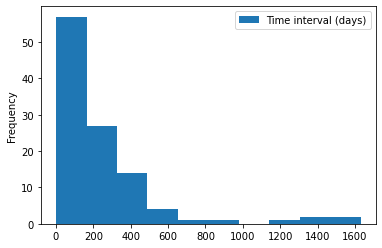

In [21]:
MineAccidentDF.plot.hist(bins=10)

Jeśli użyjemy pomiaru rozpiętości, który jest mniej wrażliwy na wartości odstające, możemy otrzymać dokładniejszy opis naszych danych. *Przedział międzykwartylowy* (*IQR*) jest lepszym rozwiązaniem, ponieważ jest odporny na wartości odstające. Jest on lepszą metodą, ponieważ wartości odstające nie są bezpośrednio wykorzystywane przy obliczaniu parametru. Natomiast *odchylenie standardowe*, *wariancja* i *średnia* wykorzystują *wszystkie* dane w obliczeniach - w tym wartości odstające - dlatego właśnie są wrażliwe na wartości odstające.

Gdybyśmy mieli uporządkować dane od najmniejszego do największego, a następnie podzielilibyśmy dane według mediany, mielibyśmy górną i dolną połowę danych. Następnie, gdybyśmy znaleźli mediany obu tych górnych i dolnych połówek danych oraz znaleźlibyśmy różnicę między nimi, byłby to właśnie *IQR*.

Słowo „kwartyl” bierze się z faktu, że dzielimy dane na cztery segmenty. Każdy z tych segmentów daje statystykę kwartylową.

Pierwszy kwartyl ($Q1$) to mediana dolnej połowy danych – czyli dokładnie 25% listy uporządkowanych danych.

Mediana całej populacji to drugi kwartyl ($2Q$) — 50% na liście uporządkowanych danych.

Trzeci kwartyl ($Q3$) to mediana górnej połowy danych – 75% przez listę uporządkowanych danych.

Wreszcie czwarty kwartyl ($Q4$) – który nie jest zbyt przydatny – to ostatnia część danych na zorganizowanej liście.

Obliczamy *IQR* w następujący sposób:

$\large IQR = Q3 - Q1$

Aby znaleźć kwartyle, używamy [funkcji](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html) `.quantile()` w naszej *DataFrame* (Zauważ, że funkcja to **"kwant**yl", a nie **"kwart**yl").

Ponieważ $Q2$ to 25% na liście zorganizowanych danych, musimy mieć `0.25` jako parametr w funkcji. Podobnie, `Q3` musi mieć jako parametr `0,75`, ponieważ jest to 75% danych. Ponieważ ten argument jest liczbą, nie musimy zapisywać go w `""`.

In [22]:
Q1 = MineAccidentDF["Time interval (days)"].quantile(0.25)
Q1

54.0

In [23]:
Q3 = MineAccidentDF["Time interval (days)"].quantile(0.75)
Q3

315.0

Dzięki tym statystykom możemy obliczyć IQR za pomocą powyższego wzoru.

In [24]:
IQR = Q3 - Q1
IQR

261.0

**Ćwiczenie 4:** *Oblicz Q1 z `.quantile(0.25)` i Q3 z `.quantile(0.75)` w `Symetrical[0]` DataFrame i wypisz wyniki.*

In [25]:
#Answer
print(Symmetrical[0].quantile(0.25))
print(Symmetrical[0].quantile(0.75))

4.0
6.0


**Wykresy pudełkowe (box plot) i wartości odstające**

Kilka parametrów statystycznych jest szczególnie wrażliwych na wartości odstające, w szczególności *średnia*, *wariancja* i *odchylenie standardowe*. Aby zminimalizować wypaczenie tych parametrów, często usuwa się wartości odstające z zestawów danych.

Istnieje kilka sposobów obliczenia wartości odstającej. Skupmy się na metodzie $1.5 \cdot IQR$.

Dzięki niej tworzymy granice, w których znajduje się zdecydowana większość danych. Rozszerzamy $Q1$ i $Q3$ o $1,5 \cdot IQR$ po obu stronach. Granice są obliczane za pomocą poniższych wzorów.

$Dolna granica = Q1 - 1,5*IQR$

$Górna granica = Q3 + 1,5*IQR$

Dane, które są większe niż *dolna granica* i mniejsze niż *górna granica*, to dane, które przechowujemy. Dlatego jeśli część danych wykracza poza te granice, klasyfikujemy ją jako odstającą i usuwamy ją ze zbioru danych.

In [26]:
LowerBound = Q1 - 1.5*IQR
LowerBound

-337.5

In [27]:
HigherBound = Q3 + 1.5*IQR
HigherBound

706.5

Aby usunąć wartości odstające z *DataFrame*, najpierw należy utworzyć instrukcję logiczną opisującą dane, które chcemy zachować. Można to zrobić w następujący sposób:

1. Chcemy, aby wszystkie dane z `MineAccidentDF["Time interval (days)"]` były mniejsze niż `HigherBound`. Można to opisać w następujący sposób.
    ```Python
    MineAccidentDF["Time interval (days)"] < HigherBound
    ```
2. I chcemy, aby wszystkie dane z `MineAccidentDF["Przedział czasu (dni)"]` były większe niż `Dolna granica`. Można to opisać w następujący sposób.
    ```Python
    MineAccidentDF["Time interval (days)"] > LowerBound
    ```
3. Możemy połączyć obie te instrukcje logiczne za pomocą symbolu `&`. Zauważ, że musimy użyć nawiasów okrągłych wokół każdej z połączonych instrukcji.
    ```Python
    (MineAccidentDF["Time interval (days)"] < HigherBound) & (MineAccidentDF["Time interval (days)"] > LowerBound)
    ```
    Niestety nie możemy użyć następującej instrukcji ` LowerBound < MineAccidentDF["Time interval (days)"] < HigherBound` w Pythonie i zamiast tego musimy użyć symbolu `&`.
    
    
Poniżej znajduje się przykład połączonej instrukcji. Wszystkie wyniki `True` to dane, które przechowujemy, a `False` to wartości odstające, które zostaną później wykluczone.

In [28]:
(MineAccidentDF["Time interval (days)"] < HigherBound) & (MineAccidentDF["Time interval (days)"] > LowerBound)

0       True
1       True
2       True
3       True
4       True
       ...  
104     True
105     True
106     True
107     True
108    False
Name: Time interval (days), Length: 109, dtype: bool

Aby wykluczyć wszystkie wartości odstające, należy po prostu umieścić instrukcję połączonej logiki w funkcji `.loc[]`, która działa na `MineAccidentDF`.

Poniższy kod to właśnie taki przykład, zapisuje wynikowy *DataFrame* jako `MineAccident_ExOutliers`.

In [29]:
MineAccident_ExOutliers = MineAccidentDF.loc[(MineAccidentDF["Time interval (days)"] < HigherBound) & (MineAccidentDF["Time interval (days)"] > LowerBound)]
MineAccident_ExOutliers

Time interval (days)
0                     378
1                      36
2                      15
3                      31
4                     215
..                    ...
102                   129
104                    29
105                   217
106                     7
107                    18

[102 rows x 1 columns]

Dlatego teraz nowa DataFrame, `MineAccident_ExOutliers`, nie zawiera usuniętych wartości odstających zdefiniowanych przez nasze granice.

Wykreślenie `MineAccident_ExOutliers` na histogramie pokaże, jak w konsekwencji zmienił się rozkład.

<AxesSubplot:ylabel='Frequency'>

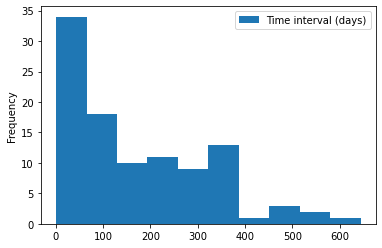

In [30]:
MineAccident_ExOutliers.plot.hist()

Jeśli porównamy średnie *DataFrame* przed i po usunięciu wartości odstających, pokaże to również, jak wrażliwa jest średnia na wartości odstające.

In [31]:
MineAccident_ExOutliers["Time interval (days)"].mean()  # Nie wliczając wartości odstających

171.86274509803923

In [32]:
MineAccidentDF["Time interval (days)"].mean()  # Włączając wartości odstające

240.94495412844037

Wykresy pudełkowe (box plots) - lub "wykresy pudełkowe z wąsem" (box-and-whisker plots) - to kolejny sposób na wykreślenie rozkładu danych. W szczególności wykres ten wykorzystuje metodę wartości odstających 1,5 $ * IQR $ w celu znalezienia wartości odstających. Jest on bardzo szybkim sposobem oceny zestawu danych w celu znalezienia konkretnych wartości odstających.

Aby wykreślić wykres pudełkowy, musimy użyć [funkcji](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html) `.plot.box()`. W tej funkcji nie musimy przekazywać żadnych argumentów.

<AxesSubplot:>

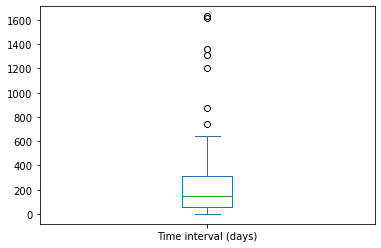

In [33]:
MineAccidentDF.plot.box()

Środkowa zielona linia to mediana *DataFrame*.

Niebieskie pole otaczające medianę (zielona linia) to $Q1$ i $Q3$.

Wąsy na tym niebieskim pudełku przedstawiają 1,5 $ * IQR $ od $Q1$ i $Q3$.

Poszczególne fragmenty danych poza wąsami są wartościami odstającymi i są oznaczone okręgami.

**Ćwiczenie 5:** *Narysuj wykres pudełkowy `Symmetrical[0]`.*

<AxesSubplot:>

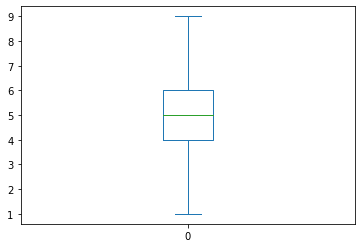

In [34]:
#Odpowiedź
Symmetrical[0].plot.box()

**Zmiana procentowa i tempo wzrostu**

Poniżej znajdują się dane z epidemii Covid-19 w UE w okresie od 01.01.2020 do 30.06.2020 r. [2]

In [35]:
covid_df = pd.read_csv("https://raw.githubusercontent.com/ThomasJewson/datasets/master/EUCOVID19CasesDeaths.csv")
covid_df

Month  Confirmed Cases  Deaths
0   Jan               17       0
1   Feb             1126      23
2   Mar           429495   27919
3   Apr           862359  105371
4   May           642607   39892
5   Jun           492489   18220

W styczniu było 17 potwierdzonych przypadków Covid-19 w UE, a do lutego liczba ta wzrosła do 1126 przypadków. Aby obliczyć procentową zmianę między tymi dwoma, musimy użyć następującego równania:

$\large \text{Zmiana procentowa}=100*\frac{Końcowy - początkowy}{początkowy}$

Alternatywnie możemy również użyć tego równania:

$\large \text{Zmiana procentowa}=100*\frac{Końcowa}{Początkowa}-1$

W poniższym kodzie obliczamy zmianę procentową między styczniem a lutym.

In [36]:
initial = 17
final = 1126
pctchange = 100*(final - initial) / initial
pctchange

6523.529411764706

In [37]:
pctchange = 100*((final / initial) - 1)
pctchange

6523.529411764705

Jak widać, w okresie od stycznia do lutego nastąpił bardzo duży procentowy wzrost przypadków COVID-19 w UE.

Generalnie zmiany procentowe nie są liczbami całkowitymi, dlatego warto zaokrąglić wynik. Można to zrobić za pomocą [funkcji](https://docs.python.org/3/library/functions.html#round) `round()` .

Funkcja round wymaga dwóch argumentów pozycyjnych. Pierwszym argumentem są dane, które chcemy zaokrąglić, w tym przypadku jest to zmienna `pctchange`. Drugi argument to liczba miejsc po przecinku, do których chcemy zaokrąglić, którą wyrażamy jako liczbę całkowitą.

In [38]:
round(
    pctchange, #To nasze dane
    1 #To ilość miejsc po przecinku które chcemy mieć po zaokrągleniu
)

6523.5

Aby obliczyć procentową zmianę dla całej kolumny danych w DataFrame, używamy [funkcji](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html) `.pct_change()` . Jednak nadal musimy pomnożyć tą liczbę przez 100, aby w wyniku uzyskać procent.

In [39]:
pctdata = covid_df["Confirmed Cases"].pct_change()*100
pctdata

0             NaN
1     6523.529412
2    38043.428064
3      100.784410
4      -25.482659
5      -23.360779
Name: Confirmed Cases, dtype: float64

Możemy również zaokrąglić wszystkie liczby w *DataFrame* za pomocą [funkcji](https://docs.python.org/3/library/functions.html#round) `round()` , umieszczając nasze `pctdata` *DataFrame* jako pierwszy argument funkcji.

In [40]:
round(pctdata,2)

0         NaN
1     6523.53
2    38043.43
3      100.78
4      -25.48
5      -23.36
Name: Confirmed Cases, dtype: float64

Na podstawie tego możemy stwierdzić, że liczba przypadków koronawirusa rosła w UE w najszybszym tempie w marcu 2020 r., Ponieważ procentowy wzrost w przypadkach wyniósł 38 043,43%.

**Wnioski:**

*Powinieneś być teraz w stanie wykonać następujące czynności:*

1. Obliczyć następujące średnie:
     1. Średnia z `.mean()`;
     2. Mediana z `.median()`;
     3. Moda z `.mode()`.
2. Obliczyć następujące miary rozpiętości:
     1. Wariancja od zera i z `.var()`;
     2. Odchylenie standardowe (ręcznie i z wykorzystaniem funkcji) `.std()`.
3. Obliczyć rozstęp międzykwartylowy (IQR) za pomocą funkcji `.quantile`.
4. Użyć metody ${1.5*IQR}$, aby usunąć wartości odstające za pomocą `&` między dwoma instrukcjami logicznymi.
5. Utwórzyć wykres pudełkowy za pomocą `.plot.box()`.
6. Znaleźć zmianę procentową (ręcznie, a także za pomocą funkcji) `.pct_change()`.

**Źródła:**

[1] B.A. Maguire, E.S. Pearson, A.H.A. Wynn (1952).
"The Time Intervals Between Industrial Accidents", Biometrika Vol. 39, #1/2 pp. 168-180

[2] European Centre for Disease Prevention and Control